In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Colab Notebooks/tfm"
import sys
sys.path.append('tfm/checkpoints/')
sys.path.append('tfm/outputs/')

Mounted at /content/drive


In [186]:
filepath = "tfm/outputs/dataset_2022_paragraph" # Filepath COLAB
filepath_news = "tfm/outputs/dataset_2022_news" # Filepath COLAB

In [ ]:
#0. Partiendo de dataset_2021_paragraph.csv, lo pasamos por el annotator, para anotar manualmente un numero de párrafos

In [ ]:
#1. Leo dataset con anotaciones
# df_annotated = pd.read_csv(f'{filepath}_annotated.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")

In [ ]:
#2. Este dataset anotado, es la entrada a los modelos para estimar las features finanzas si/no e impacto si/no de la noticia

In [ ]:
#3. Unimos las datasets de finanzas e impacto

In [148]:
df_predict_impacto_tag_s_n = pd.read_csv(f'{filepath}_predict_impacto_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")

In [5]:
df = df_predict_impacto_tag_s_n.copy()

In [6]:
df_predict_impacto_tag_s_n.impacto_tag_s_n.value_counts()

1    425751
0     73903
Name: impacto_tag_s_n, dtype: int64

In [ ]:
df_predict_finanzas_tag_s_n = pd.read_csv(f'{filepath}_predict_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")

In [ ]:
df_predict_finanzas_tag_s_n.finanzas_tag_s_n.value_counts()

1    423249
0     76405
Name: finanzas_tag_s_n, dtype: int64

In [ ]:
#MERGE finanzas tags
df["finanzas_tag_s_n_confianza"] = df_predict_finanzas_tag_s_n["finanzas_tag_s_n_confianza"]
df["finanzas_tag_s_proba"] = df_predict_finanzas_tag_s_n["finanzas_tag_s_proba"]
df["finanzas_tag_s_n"] = df_predict_finanzas_tag_s_n["finanzas_tag_s_n"]

In [ ]:
df.dtypes

pk                                    object
pk_paragraph                          object
date                          datetime64[ns]
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker                                object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float64
rd_activo_

In [ ]:
df.to_csv(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', sep=";", index=True)

In [ ]:
#3. Agregamos las features de párrafo a nivel noticia

In [187]:
df_paragraph = pd.read_csv(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n", index_col=0)

In [188]:
df_news = pd.read_csv(f"{filepath_news}.csv", sep=";", parse_dates=["date"], index_col=0)
df_news.shape

(14372, 36)

In [189]:
df_paragraph.dtypes

pk                                    object
pk_paragraph                          object
date                          datetime64[ns]
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker                                object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float64
rd_activo_

In [190]:
print(df_news.dtypes)
df_news

date                          datetime64[ns]
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker                                object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float64
rd_activo_news                       float64
rd_bench_news                        float64
alpha_exan

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,alpha_exante_above_Q3,vola20_exante,vola20_expost,vola20_antepost_pct_change,vola20_umbral_Q1,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs
pk,,,,,,,,,,,,,,,,,,,,,
1656536901065_6_IBE,2022-01-01 02:38:00,"Las vacunas, el Madrid de Ayuso y el Falcon de...",https://elpais.com/television/2022-01-01/las-v...,"De haber empezado ahora sus carreras, Eugenio,...","['Televisión', 'Opinión', 'La 2', 'RTVE', 'Mús...",ELPAIS,IBE,"IBERDROLA, S.A.",Petróleo y Energía,Electricidad y Gas,...,False,0.252305,0.156200,-0.380905,-0.415945,0.328537,-0.328537,0.415945,0.0,0.0
1656536877077_6_TEF,2022-01-01 04:29:00,"“La homofobia no mengua con la vejez, al contr...",https://elpais.com/icon/2022-01-01/la-homofobi...,Entre un mar de ladrillos rojos y toldos verde...,"['Comunidad Lgtbiq', 'Madrid', 'Residencias an...",ELPAIS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,False,0.260783,0.163380,-0.373501,-0.477420,0.399914,-0.399914,0.477420,1.0,0.0
1656536843436_6_CABK,2022-01-01 04:40:00,La espiral de la subida de precios mermará la ...,https://elpais.com/economia/2022-01-01/la-pand...,El coronavirus no es la única pandemia que suf...,"['Inflación', 'Precios', 'España', 'Economía',...",ELPAIS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.214840,0.306254,0.425497,-0.136999,0.053781,-0.021890,0.239339,1.0,1.0
1656536843436_6_TEF,2022-01-01 04:40:00,La espiral de la subida de precios mermará la ...,https://elpais.com/economia/2022-01-01/la-pand...,El coronavirus no es la única pandemia que suf...,"['Inflación', 'Precios', 'España', 'Economía',...",ELPAIS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,False,0.260783,0.163380,-0.373501,-0.477420,0.399914,-0.399914,0.477420,1.0,0.0
1656536615350_6_BBVA,2022-01-01 08:42:56,«Poca gente va a tener un ordenador cuántico y...,https://www.abc.es/ciencia/abci-poca-gente-ten...,"En 1984, Charles Bennett y Gilles Brassard inv...","['Fundacion BBVA', 'Bilbao', 'Física cuántica'...",ABC,BBVA,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.245898,0.231248,-0.059578,-0.561311,0.364196,-0.364196,0.561311,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656540429231_6_SAN,2022-04-30 21:23:40,Empresa Familiar: 25 años de compromiso,https://www.abc.es/espana/castilla-leon/abci-e...,Unidos potenciamos las virtudes que hacen de l...,"['Castilla y León', 'Alfonso Fernández Mañueco...",ABC,SAN,"BANCO SANTANDER, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,True,0.370740,0.305502,-0.175968,-0.167242,0.130216,0.137923,0.174029,-1.0,-1.0
1656540135829_6_REP,2022-04-30 21:35:00,Jorge Lorenzo se convierte en 'Leyenda' del Mu...,https://www.europapress.es/deportes/motociclis...,"MADRID, 30 Abr. (EUROPA PRESS) -<EOL>El expilo...",['Moto GP'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,True,0.409904,0.427956,0.044040,0.289037,0.289037,0.653026,0.653026,-1.0,0.0
1656540395299_6_ACS,2022-04-30 22:51:13,"El Madrid gana la Liga, en directo | Los campe...",https://www.abc.es/espana/madrid/abci-madrid-g...,La diosa Cibeles aguarda a los aficionados del...,"['Real Madrid', 'Fútbol']",ABC,ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A,"Mat.Basicos, Industria y Construcción",Construcción,...,False,0.214527,0.206707,-0.036449,-0.244060,0.031471,-0.028526,0.244060,0.0,0.0


In [191]:
df_grpby = df_paragraph.groupby(['pk'])

In [192]:
df_news["body_no_entities"] = df_paragraph.groupby(['pk'])['body_no_entities'].apply(lambda x: ' '.join(x))

In [193]:
df_news["title_no_entities"] = df_paragraph.groupby(['pk']).first()['title_no_entities']

In [194]:
df_paragraph.impacto_tag_s_n.value_counts()
# [('Sí', 0),
# ('No', 1), 

1    133730
0     26378
Name: impacto_tag_s_n, dtype: int64

In [195]:
def func_apply(group):
    # agregación de pesos de los párrafos a nivel de noticia dando más importancia a los primeros párrafos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.impacto_tag_s_n) / np.sum(idx)

In [196]:
df_news["impacto_tag_s_n"] = df_grpby.apply(lambda x: func_apply(x))

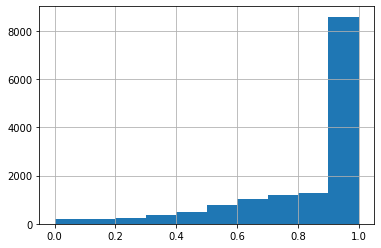

In [197]:
df_news["impacto_tag_s_n"].hist()

In [198]:
df_news["impacto_tag_s_n"] = df_news["impacto_tag_s_n"] > 0.5
df_news["impacto_tag_s_n"] = df_news["impacto_tag_s_n"].astype(int)

In [199]:
df_news["impacto_tag_s_n"].value_counts()

1    12796
0     1576
Name: impacto_tag_s_n, dtype: int64

In [200]:
def func_apply(group):
    # agregación de pesos de los párrafos a nivel de noticia dando más importancia a los primeros párrafos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.impacto_tag_s_proba) / np.sum(idx)

In [201]:
df_news["impacto_tag_s_proba"] = df_grpby.apply(lambda x: func_apply(x))

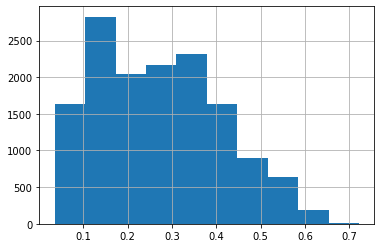

In [202]:
df_news["impacto_tag_s_proba"].hist()

In [203]:
df_paragraph.finanzas_tag_s_n.value_counts()

1    132563
0     27545
Name: finanzas_tag_s_n, dtype: int64

In [204]:
def func_apply(group):
    # agregación de pesos de los párrafos a nivel de noticia dando más importancia a los primeros párrafos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.finanzas_tag_s_n) / np.sum(idx)

In [205]:
df_news["finanzas_tag_s_n"] = df_grpby.apply(lambda x: func_apply(x))

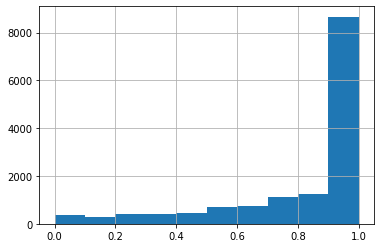

In [206]:
df_news["finanzas_tag_s_n"].hist()

In [207]:
df_news["finanzas_tag_s_n"] = df_news["finanzas_tag_s_n"] > 0.5
df_news["finanzas_tag_s_n"] = df_news["finanzas_tag_s_n"].astype(int)

In [208]:
df_news["finanzas_tag_s_n"].value_counts()

1    12377
0     1995
Name: finanzas_tag_s_n, dtype: int64

In [209]:
def func_apply(group):
    # agregación de pesos de los párrafos a nivel de noticia dando más importancia a los primeros párrafos
    idx = np.linspace(1,0,group.shape[0])    
    return np.sum(idx * group.finanzas_tag_s_proba) / np.sum(idx)

In [210]:
df_news["finanzas_tag_s_proba"] = df_grpby.apply(lambda x: func_apply(x))

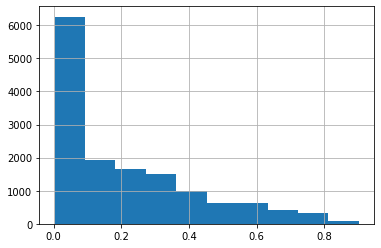

In [211]:
df_news["finanzas_tag_s_proba"].hist()

In [ ]:
# Otra modalidad más simple de agregar a nivel noticia la información de los párrafos
# df_agg = df_grpby.agg({'finanzas_tag_s_n' : 'sum',
#                        'impacto_tag_s_n' : 'sum',
#                        'impacto_tag_s_proba':'sum', 
#                        'finanzas_tag_s_proba':'sum', 
#                        'ticker':'count'
#                        })

In [ ]:
# df_news["finanzas_tag_s_n"] = (df_agg.finanzas_tag_s_n / df_agg.ticker)>0.5
# df_news["finanzas_tag_s_n"] = df_news["finanzas_tag_s_n"].astype(int)
# df_news["impacto_tag_s_n"] = (df_agg.impacto_tag_s_n / df_agg.ticker)>0.5
# df_news["impacto_tag_s_n"] = df_news["impacto_tag_s_n"].astype(int)

# df_news["impacto_tag_s_proba"] = df_agg.impacto_tag_s_proba / df_agg.ticker
# df_news["finanzas_tag_s_proba"] = df_agg.finanzas_tag_s_proba / df_agg.ticker

In [212]:
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs,body_no_entities,title_no_entities,impacto_tag_s_n,impacto_tag_s_proba,finanzas_tag_s_n,finanzas_tag_s_proba
pk,,,,,,,,,,,,,,,,,,,,,
1656536901065_6_IBE,2022-01-01 02:38:00,"Las vacunas, el Madrid de Ayuso y el Falcon de...",https://elpais.com/television/2022-01-01/las-v...,"De haber empezado ahora sus carreras, Eugenio,...","['Televisión', 'Opinión', 'La 2', 'RTVE', 'Mús...",ELPAIS,IBE,"IBERDROLA, S.A.",Petróleo y Energía,Electricidad y Gas,...,-0.328537,0.415945,0.0,0.0,"De haber empezado ahora sus carreras, Eugenio,...","Las vacunas, el Madrid de Ayuso y el Falcon de...",1,0.073654,1,0.011043
1656536877077_6_TEF,2022-01-01 04:29:00,"“La homofobia no mengua con la vejez, al contr...",https://elpais.com/icon/2022-01-01/la-homofobi...,Entre un mar de ladrillos rojos y toldos verde...,"['Comunidad Lgtbiq', 'Madrid', 'Residencias an...",ELPAIS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,-0.399914,0.477420,1.0,0.0,Entre un mar de ladrillos rojos y toldos verde...,"“La homofobia no mengua con la vejez, al contr...",1,0.110269,1,0.029852
1656536843436_6_CABK,2022-01-01 04:40:00,La espiral de la subida de precios mermará la ...,https://elpais.com/economia/2022-01-01/la-pand...,El coronavirus no es la única pandemia que suf...,"['Inflación', 'Precios', 'España', 'Economía',...",ELPAIS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,-0.021890,0.239339,1.0,1.0,El coronavirus no es la única pandemia que suf...,La espiral de la subida de precios mermará la ...,1,0.449562,1,0.228651
1656536843436_6_TEF,2022-01-01 04:40:00,La espiral de la subida de precios mermará la ...,https://elpais.com/economia/2022-01-01/la-pand...,El coronavirus no es la única pandemia que suf...,"['Inflación', 'Precios', 'España', 'Economía',...",ELPAIS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,-0.399914,0.477420,1.0,0.0,El coronavirus no es la única pandemia que suf...,La espiral de la subida de precios mermará la ...,1,0.449562,1,0.228651
1656536615350_6_BBVA,2022-01-01 08:42:56,«Poca gente va a tener un ordenador cuántico y...,https://www.abc.es/ciencia/abci-poca-gente-ten...,"En 1984, Charles Bennett y Gilles Brassard inv...","['Fundacion BBVA', 'Bilbao', 'Física cuántica'...",ABC,BBVA,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,-0.364196,0.561311,1.0,0.0,"En 1984, Charles Bennett y Gilles Brassard inv...",«Poca gente va a tener un ordenador cuántico y...,1,0.102274,1,0.039670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656540429231_6_SAN,2022-04-30 21:23:40,Empresa Familiar: 25 años de compromiso,https://www.abc.es/espana/castilla-leon/abci-e...,Unidos potenciamos las virtudes que hacen de l...,"['Castilla y León', 'Alfonso Fernández Mañueco...",ABC,SAN,"BANCO SANTANDER, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.137923,0.174029,-1.0,-1.0,Unidos potenciamos las virtudes que hacen de l...,Empresa Familiar: 25 años de compromiso,1,0.125036,1,0.045951
1656540135829_6_REP,2022-04-30 21:35:00,Jorge Lorenzo se convierte en 'Leyenda' del Mu...,https://www.europapress.es/deportes/motociclis...,"MADRID, 30 Abr. (EUROPA PRESS) -<EOL>El expilo...",['Moto GP'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,0.653026,0.653026,-1.0,0.0,"MADRID, 30 Abr. (EUROPA PRESS) - El expiloto e...",Jorge Lorenzo se convierte en 'Leyenda' del Mu...,1,0.115918,1,0.016503
1656540395299_6_ACS,2022-04-30 22:51:13,"El Madrid gana la Liga, en directo | Los campe...",https://www.abc.es/espana/madrid/abci-madrid-g...,La diosa Cibeles aguarda a los aficionados del...,"['Real Madrid', 'Fútbol']",ABC,ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A,"Mat.Basicos, Industria y Construcción",Construcción,...,-0.028526,0.244060,0.0,0.0,La dios

In [213]:
df_news.to_csv(f'{filepath_news}_predict_impacto_finanzas_tag_s_n.csv', sep=";")

In [ ]:
#3. Sobre este dataset mergeado con ambas etiquetas y las nuevas properties, aplicamos los filtros de noticias que consideremos

In [ ]:
df = pd.read_csv(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", sep=";", parse_dates=["date"],low_memory=False, lineterminator="\n", index_col=0)
df.shape

(46635, 41)

In [ ]:
df

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs,body_no_entities,finanzas_tag_s_n,impacto_tag_s_n,impacto_tag_s_proba,finanzas_tag_s_proba
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.114337,0.305009,0.417972,0.0,0.0,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,1,1,0.250098,0.092213
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,0.103677,0.208834,0.225065,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,1,1,0.253235,0.197973
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.103478,0.236113,0.315340,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,1,1,0.253235,0.197973
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.139145,0.290371,0.324701,1.0,1.0,24 componentes en negativo El Ibex cierra un a...,1,1,0.253235,0.197973
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,0.114337,0.305009,0.417972,0.0,0.0,24 componentes en negativo El Ibex cierra un a...,1,1,0.253235,0.197973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656406861597_6_REP,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,0.272479,-0.270908,0.357201,1.0,0.0,"MÁLAGA, 31 Dic. (EUROPA PRESS) - El alcalde de...",1,1,0.103857,0.024516
1656406861597_6_TEF,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,0.399914,-0.399914,0.477420,1.0,0.0,"MÁLAGA, 31 Dic. (EUROPA PRESS) - El alcalde de...",1,1,0.103857,0.024516
1656407079517_9_CABK,2022-01-03 10:08:00,CaixaBank Banca Privada recomienda a gran part...,https://www.europapress.es/economia/finanzas-0...,"MADRID, 28 Dic. (EUROPA PRESS) -<EOL>CaixaBank...","['Sector financiero', 'Caixabank']",EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,0.053781,0.059615,0.251531,1.0,1.0,"MADRID, 28 Dic. (EUROPA PRESS) - Banca Privada...",1,1,0.270544,0.169495


In [ ]:
df_paragraph = pd.read_csv(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n", index_col=0)

In [ ]:
df['date_agg'] = df.date.dt.date

In [ ]:
#Nos quedamos con las noticias que han publicado solamente 1 vez en el dia en el mismo media para un ticker para evitar aprender de noticias con impactos en volatilidad contradictorios
df_grpby = df.groupby(['date_agg','ticker','resource'])
df_agg = df_grpby.agg({'ticker':'count'})
df_agg = df_agg[df_agg.ticker==1]

In [ ]:
df = pd.merge(df, df_agg,  how='inner', left_on=['date_agg','ticker','resource'], right_index=True)
df.dtypes

date                          datetime64[ns]
ticker                                object
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker_x                              object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float64
rd_activo_news                       float64
rd_bench_n

In [ ]:
df.drop('ticker_x', axis=1, inplace=True)
df.drop('date_agg', axis=1, inplace=True)
df.drop('ticker_y', axis=1, inplace=True)

In [ ]:
#Intensidad > 2
df = df[df.intensidad > 2]
df.shape

(3856, 41)

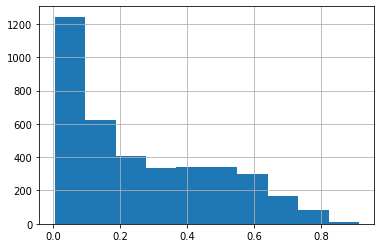

In [ ]:
#Otros posibles filtros
df.finanzas_tag_s_proba.hist()

In [ ]:
# umbral = 0.55
# df = df[df.finanzas_tag_s_proba > umbral]
# df.shape

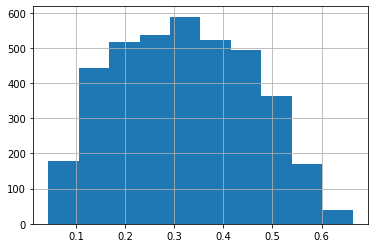

In [ ]:
df.impacto_tag_s_proba.hist()

In [ ]:
# umbral = 0.55
# df = df[df.impacto_tag_s_proba > umbral]
# df.shape

In [ ]:
df.to_csv(f"{filepath_news}_filters.csv", sep=";", index=True)

In [ ]:
df_paragraph = df_paragraph[df_paragraph.pk.isin(df.index.tolist())]

In [ ]:
df_paragraph.set_index("pk", inplace=True)

In [ ]:
df_paragraph.to_csv(f"{filepath}_filters.csv", sep=";", index=True)

In [ ]:
df = pd.read_csv(f"{filepath_news}_filters.csv", sep=";", parse_dates=["date"], index_col=0)
print(df.shape)
df.dtypes

(3856, 41)


date                          datetime64[ns]
ticker                                object
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float64
rd_activo_news                       float64
rd_bench_news                        float64
alpha_exan

In [ ]:
df_paragraph = pd.read_csv(f"{filepath}_filters.csv", sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")
print(df_paragraph.shape)
print(df_paragraph.dtypes)

(42285, 54)
pk                                    object
pk_paragraph                          object
date                          datetime64[ns]
title                                 object
url                                   object
body                                  object
tags                                  object
resource                              object
ticker                                object
ticker_name                           object
sector                                object
subsector                             object
ticker_freq                            int64
ticker_first                         float64
ticker_title                         float64
tickers                               object
entities                              object
topic_classifier                      object
topics                                object
finanzas_prob                        float64
sector_in_topics                       int64
intensidad                           float6

In [ ]:
## GENERACIÓN DEL DATASET TOTAL SIN FILTROS

In [214]:
# Ejecutar solo para la union de todo el histórico
lst = ['2017','2018','2019','2020','2021','2022']
result_news = None
result_paragraph = None
for yy in lst:
  filepath = f"tfm/outputs/dataset_{yy}_paragraph" # Filepath COLAB
  filepath_news = f"tfm/outputs/dataset_{yy}_news" # Filepath COLAB

  df = pd.read_csv(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", sep=";", parse_dates=["date"],low_memory=False, lineterminator="\n", index_col=0)
  print(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", df.shape)
  if not result_news is None:
      result_news = pd.concat([result_news, df])
  else:
      result_news = df

  df = pd.read_csv(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n", index_col=0)
  print(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', df.shape)
  if not result_paragraph is None:
      result_paragraph = pd.concat([result_paragraph, df])
  else:
      result_paragraph = df

filepath = f"tfm/outputs/dataset_paragraph" # Filepath COLAB
filepath_news = f"tfm/outputs/dataset_news" # Filepath COLAB

result_news.sort_values(by=["date", "pk"], inplace=True)
result_news.to_csv(
    f"{filepath_news}_total_no_filters.csv",
    sep=";",
    # index=False,
)

result_paragraph.sort_values(by=["date", "pk_paragraph"], inplace=True)
result_paragraph.to_csv(
    f"{filepath}_total_no_filters.csv",
    sep=";",
    # index=False,
)

tfm/outputs/dataset_2017_news_predict_impacto_finanzas_tag_s_n.csv (34350, 42)
tfm/outputs/dataset_2017_paragraph_predict_impacto_finanzas_tag_s_n.csv (412278, 54)
tfm/outputs/dataset_2018_news_predict_impacto_finanzas_tag_s_n.csv (45550, 42)
tfm/outputs/dataset_2018_paragraph_predict_impacto_finanzas_tag_s_n.csv (736299, 54)
tfm/outputs/dataset_2019_news_predict_impacto_finanzas_tag_s_n.csv (51098, 42)
tfm/outputs/dataset_2019_paragraph_predict_impacto_finanzas_tag_s_n.csv (612424, 54)
tfm/outputs/dataset_2020_news_predict_impacto_finanzas_tag_s_n.csv (49548, 42)
tfm/outputs/dataset_2020_paragraph_predict_impacto_finanzas_tag_s_n.csv (635924, 54)
tfm/outputs/dataset_2021_news_predict_impacto_finanzas_tag_s_n.csv (46635, 42)
tfm/outputs/dataset_2021_paragraph_predict_impacto_finanzas_tag_s_n.csv (499654, 54)
tfm/outputs/dataset_2022_news_predict_impacto_finanzas_tag_s_n.csv (14372, 42)
tfm/outputs/dataset_2022_paragraph_predict_impacto_finanzas_tag_s_n.csv (160108, 54)


In [215]:
df = pd.read_csv(f"{filepath}_total_no_filters.csv", sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n", index_col=0)

In [216]:
df.shape

(3056687, 54)

In [218]:
df.intensidad.min()

1.0

In [ ]:
lst = ['2017','2018','2019','2020','2021','2022']
for yy in lst:
  filepath = f"tfm/outputs/dataset_{yy}_paragraph" # Filepath COLAB
  filepath_news = f"tfm/outputs/dataset_{yy}_news" # Filepath COLAB

  print(yy)

  df = pd.read_csv(f'{filepath}_predict_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")
  print(f'{filepath}_predict_finanzas_tag_s_n.csv', df.shape)

  df = pd.read_csv(f'{filepath}_predict_impacto_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")
  print(f'{filepath}_predict_impacto_tag_s_n.csv', df.shape)    

  df = pd.read_csv(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n", index_col=0)
  print(f'{filepath}_predict_impacto_finanzas_tag_s_n.csv', df.shape)  
  # print(df)

  df = pd.read_csv(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", sep=";", parse_dates=["date"],low_memory=False, lineterminator="\n", index_col=0)
  print(f"{filepath_news}_predict_impacto_finanzas_tag_s_n.csv", df.shape)
  # print(df)

  df = pd.read_csv(f"{filepath_news}_filters.csv", sep=";", parse_dates=["date"], index_col=0)  
  print(f"{filepath_news}_filters.csv", df.shape)
  # print(df)

  df = pd.read_csv(f"{filepath}_filters.csv", sep=";", parse_dates=["date"], low_memory=False, lineterminator="\n")
  print(f"{filepath}_filters.csv", df.shape)  
  # print(df)

2017
tfm/outputs/dataset_2017_paragraph_predict_finanzas_tag_s_n.csv (412278, 52)
tfm/outputs/dataset_2017_paragraph_predict_impacto_tag_s_n.csv (412278, 52)
tfm/outputs/dataset_2017_paragraph_predict_impacto_finanzas_tag_s_n.csv (412278, 54)
tfm/outputs/dataset_2017_news_predict_impacto_finanzas_tag_s_n.csv (34350, 41)
tfm/outputs/dataset_2017_news_filters.csv (2444, 41)
tfm/outputs/dataset_2017_paragraph_filters.csv (48466, 54)
2018
tfm/outputs/dataset_2018_paragraph_predict_finanzas_tag_s_n.csv (736299, 52)
tfm/outputs/dataset_2018_paragraph_predict_impacto_tag_s_n.csv (736299, 52)
tfm/outputs/dataset_2018_paragraph_predict_impacto_finanzas_tag_s_n.csv (736299, 54)
tfm/outputs/dataset_2018_news_predict_impacto_finanzas_tag_s_n.csv (45550, 41)
tfm/outputs/dataset_2018_news_filters.csv (3205, 41)
tfm/outputs/dataset_2018_paragraph_filters.csv (97194, 54)
2019
tfm/outputs/dataset_2019_paragraph_predict_finanzas_tag_s_n.csv (612424, 52)
tfm/outputs/dataset_2019_paragraph_predict_impacto